Time taken: 0.015625
[1, 37.0, 66.0, 100.0, 136.0, 164.0, 189.0, 221.0, 256.0]


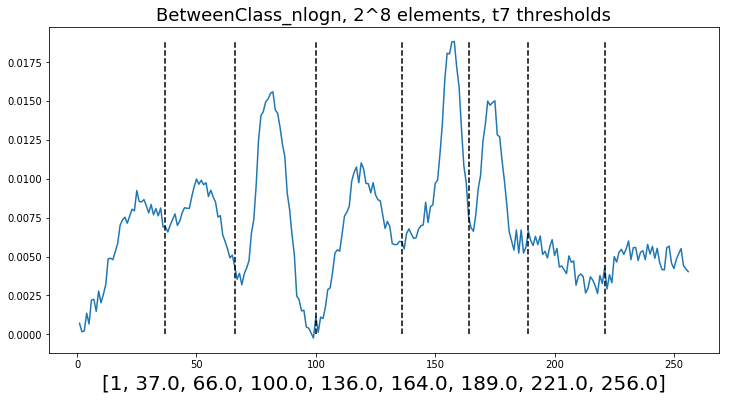

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os


folder ="C:\\Musab\\DSS_CODE\\different\\"
file = '2_8_t7.csv'
file_data = pd.read_csv(folder+file)
F = file_data['data']+file_data['noise']

fname=os.path.splitext(file)[0].split('_')
k=int(fname[2].split('t')[1])

title=("BetweenClass_nlogn, {}^{} elements, {} thresholds".format(fname[0],fname[1],fname[2]))

'''
F = [1,2,3,2,1,2,3,2,1,2,3,2,1,2,3,2,1,2,3,2,1]
k = 4
'''

def C_SUM (array):
    PC_SUM = []
    PC_SUM.append(array[0])
    for i in range (1,len(array)):
        PC_SUM.append((PC_SUM[-1]+array[i]))
    return PC_SUM

def between_sum(i,j,array):
    if i == 1:
        return (array[j-1])
    else:
        return (array[j-1]-array[i-2])
    
def V_BC (l,r,cp,cip):
    P_SUM = between_sum(l,r,cp)
    iP_SUM = between_sum(l,r,cip)
   
    try:
        return (P_SUM*(iP_SUM/P_SUM)**2)
    except:
        return (0)
    
def DIVCONQ(MAT,start,j,PM):
    m,n = MAT.shape
    rowP = int(m/2)-1
    if(rowP<0):
        rowP=0
    
    rowMaxIndex = 0
    rowMax=0
    end=rowP+start
    
    if(end>n):
        end=n
    if(end>rowP+start-PM):
        end=rowP+start-PM
        
    sid=0
    for i in range (0,end):
        vBC = C[i+minTj[j-1]+1+PM][j] + V_BC(i+minTj[j]+1+PM,rowP+minTj[j]+start,CP,CiP)

        if vBC > rowMax:
            rowMax=vBC
            rowMaxIndex = i
            sid = i+minTj[j-1]+1+PM
            
        MAT[rowP,i]=vBC
        
    D[rowP+start+j-1][j] = sid
    C[rowP+start+j][j+1] = rowMax
    
    if m == 1:
        return
    
    else:
        if int(m/2) != 1:
            DIVCONQ(MAT[0:int(m/2)-1,0:rowMaxIndex+1],start,j,PM)
        DIVCONQ(MAT[int(m/2):m,rowMaxIndex:n],start+int(m/2),j,rowMaxIndex+PM)
        
n = len(F)
#k = 6
H = list(range(1,n+1))
P = list(map(lambda X: X/sum(F),F))
i = range(1,len(P)+1)
iP = list(map(lambda X,Y: X*Y,P,i))
C = np.zeros((n+1,k+2))
D = np.zeros((n+1,k+2))
T = list(np.zeros(k+2))

CP = C_SUM (P)
CiP = C_SUM(iP)

minTj = list(np.zeros(k+2))
maxTj = list(np.zeros(k+2))

for j in range(0,k+2):
    if j == k+1:
        minTj[j] = n
    else:
        minTj[j] = j

for j in range(0,k+2):
    if j == 0:
        maxTj[j] = 0
    else:
        maxTj[j] = n-k+j-1
        
new_time_start = time.process_time()

for j in range (0,k+1): 
    
    if j == 0:
        for tj in range(minTj[j+1],maxTj[j+1]+1):
            C[tj][j+1]=V_BC(1,tj,CP,CiP)
    
    else: 
        sizeMAT = len(F)-k+1
        MAT = np.zeros((sizeMAT,sizeMAT-1))
        if (j != k):
            DIVCONQ(MAT,0,j,0)
            
        else:
            dl = minTj[k]
            for l in range(minTj[k],maxTj[k]+1):
                f = V_BC(l+1,minTj[k+1],CP,CiP)
                v = f + C[l][k]
                if (C[minTj[k+1]][k+1] < v ):
                    C[minTj[k+1]][k+1] = v
                    dl = l
            D[maxTj[k]][k]=dl
            
D[n][k+1] = n
print("Time taken:",time.process_time()-new_time_start)

T[0] = 1
i = n+1
for j in range(k+1,0,-1):
    T[j] = D[i-1][j]
    i = int(D[i-1][j])
print(T)

plt.figure(figsize=(12,6))
plt.plot(H,F)
plt.title(title,fontsize=18)
plt.xlabel(T,fontsize=20)
for i in range(1,k+1):
    plt.plot([T[i],T[i]],[0, F.max()],linestyle='--',color='black',linewidth=1.5)
plt.show()


In [9]:
k

7

In [10]:
D.shape

(257, 9)

In [11]:
C

array([[    0.  ,     0.  ,     0.  , ...,     0.  ,     0.  ,     0.  ],
       [    0.  ,     0.  ,     0.  , ...,     0.  ,     0.  ,     0.  ],
       [    0.  ,     0.  ,     0.  , ...,     0.  ,     0.  ,     0.  ],
       ...,
       [    0.  ,     0.  ,     0.  , ..., 19886.58, 19921.39,     0.  ],
       [    0.  ,     0.  ,     0.  , ...,     0.  , 20074.53,     0.  ],
       [    0.  ,     0.  ,     0.  , ...,     0.  ,     0.  , 20246.8 ]])

In [12]:
D

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   1.,   0., ...,   0.,   0.,   0.],
       [  0.,   1.,   2., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 210.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 221.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 256.]])

In [1]:
%matplotlib inline

In [3]:
np.set_printoptions(precision=2,suppress=True)